In [162]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [163]:
df = pd.read_csv("data.csv")
df.head(5)

,userId,orderId,productId,product_name,quantity,price,gmv,store,order_date
0,56af5729-be72-4dee-9142-b31449e22532,1639344465163,1a9f895f-b8db-479c-906b-a64b2ec0eeef,QUILTON TOILET PAPER TWIN PACK,1.0,3.00,3.00,ALEXANDRIA,2021-12-13
1,56af5729-be72-4dee-9142-b31449e22532,1639344465163,2f81de78-b77b-4f7e-9568-8af6757ebb6c,REXONA ROLL ON MEN 50ML,1.0,4.00,4.00,ANNANDALE,2021-12-13
2,56af5729-be72-4dee-9142-b31449e22532,1639344465163,b0c36bd7-b2a6-4d52-91c9-2a41322d19ad,COLGATE TOTAL TOOTHPASTE 40G,1.0,3.00,3.00,Collingwood Store,2021-12-13
3,56af5729-be72-4dee-9142-b31449e22532,1639344465163,887dc654-0027-4ec1-ac13-6a34b2e5bb23,GRANT'S BAMBOO TOOTHBRUSH ADULT SOFT,1.0,4.50,4.50,ALEXANDRIA,2021-12-13
4,56af5729-be72-4dee-9142-b31449e22532,1639344465163,611d6839-2fa9-4d27-9b5d-fed1c725ca51,SMITHS SALT AND VINEGAR 170G,1.0,3.75,3.75,ALEXANDRIA,2021-12-13


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 0 to 70090
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   userId        70091 non-null  object 
 1   orderId       70091 non-null  int64  
 2   productId     70091 non-null  object 
 3   product_name  70091 non-null  object 
 4   quantity      70091 non-null  float64
 5   price         70091 non-null  float64
 6   gmv           70091 non-null  float64
 7   store         70091 non-null  object 
 8   order_date    70091 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 4.8+ MB


In [165]:
df.shape

(70091, 9)

In [166]:
df.product_name.value_counts()

CTK COVID 19 RAPID TEST 2PK                          3605
HOUGH PHARMA COVID RAPID ANTIGEN TESTS 5PK           1247
BANANA EACH                                           785
AVOCADO EACH                                          650
ROCHE SARS-CoV-2 RAPID ANTIGEN TESTS 5G               573
                                                     ... 
RICK GRANT'S CHICKEN SEASONING 80G                      1
T2 EARL GREY TEA BAGS 25PK                              1
THE SPICE TAILOR INDONESIAN RENDANG CURRY 275G          1
DRUNKEN SAILOR FOREST FRUIT JAM 290G                    1
SATISFYER PRO2+ AIR PULSE STIMULATION + VIBRATION       1
Name: product_name, Length: 1853, dtype: int64

In [167]:
df.isnull().sum()

userId          0
orderId         0
productId       0
product_name    0
quantity        0
price           0
gmv             0
store           0
order_date      0
dtype: int64

In [168]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70091 entries, 0 to 70090
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   userId        70091 non-null  object        
 1   orderId       70091 non-null  int64         
 2   productId     70091 non-null  object        
 3   product_name  70091 non-null  object        
 4   quantity      70091 non-null  float64       
 5   price         70091 non-null  float64       
 6   gmv           70091 non-null  float64       
 7   store         70091 non-null  object        
 8   order_date    70091 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 4.8+ MB


In [170]:
monetory = df.groupby('userId')['gmv'].sum()
monetory = monetory.reset_index()
monetory.head()

,userId,gmv
0,0001f853-db5f-442a-9457-d4d6593314ce,35.4
1,0005c465-823c-4307-8c0f-ca427726cfd4,40.5
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,70.0
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,321.0
4,00193179-9b65-4888-bf0b-09ad22c24b96,85.4


In [171]:
monetory.sort_values("gmv",ascending = False)

,userId,gmv
1331,2d85c915-7869-4b8e-995d-0000b89ae81b,7596.02
6346,d0041d27-ec52-447c-b37b-e4a9808bace6,5285.09
3293,6ced92f6-d0ab-4108-bc51-ca192aa0e493,4034.95
4401,929154c9-bc8f-423f-9232-958b4e537fdf,2953.28
4337,8fd6ea90-3289-456e-a7b4-fc32c8ba2045,2952.63
...,...,...
1869,3fa2a316-0030-4984-b8e5-44da7b0c96c5,1.50
4066,85f5731b-a6ab-487f-aa0e-2e973dda4734,1.45
7607,f62ee2ab-46aa-478d-908f-1022ea91f685,1.45
5756,bcc4ff78-d568-4d10-bf4c-52351c618b1b,0.80


In [172]:
frequency = df.groupby('userId')['orderId'].count()
frequency = frequency.reset_index()
frequency.head()

,userId,orderId
0,0001f853-db5f-442a-9457-d4d6593314ce,6
1,0005c465-823c-4307-8c0f-ca427726cfd4,6
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,1
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,2
4,00193179-9b65-4888-bf0b-09ad22c24b96,29


In [173]:
frequency.sort_values("orderId",ascending = False)

,userId,orderId
1331,2d85c915-7869-4b8e-995d-0000b89ae81b,884
6346,d0041d27-ec52-447c-b37b-e4a9808bace6,452
4337,8fd6ea90-3289-456e-a7b4-fc32c8ba2045,371
330,0ab936e4-d71e-4e33-a6c0-32d93720cbb7,262
5480,b3c0efb6-c532-4499-a0df-060f8c136e94,220
...,...,...
4049,8582e92b-dee7-4a04-b7ab-6ec767ed1308,1
4053,85bf0636-f703-4b11-ad59-eac7e09c391d,1
4054,85c0a0e8-5ae1-4e33-9819-4c5b40b41c71,1
4055,85caec79-36d7-4757-b7df-72a0693f8338,1


In [174]:
df['duration'] = df['order_date'].max() - df['order_date']
df['duration']

0       63 days
1       63 days
2       63 days
3       63 days
4       63 days
          ...  
70086    0 days
70087    0 days
70088    0 days
70089    0 days
70090    0 days
Name: duration, Length: 70091, dtype: timedelta64[ns]

In [175]:
recency = df.groupby('userId')['duration'].min()
recency = recency.reset_index()
recency.head()

,userId,duration
0,0001f853-db5f-442a-9457-d4d6593314ce,28 days
1,0005c465-823c-4307-8c0f-ca427726cfd4,39 days
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,43 days
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,44 days
4,00193179-9b65-4888-bf0b-09ad22c24b96,4 days


In [176]:
rf = pd.merge(recency, frequency, on='userId', how='inner')
rfm = pd.merge(rf,monetory, on='userId', how='inner')
rfm.columns = ['userId', 'recency', 'frequency', 'monetory']
rfm['recency'] = rfm['recency'].dt.days
rfm.head()

,userId,recency,frequency,monetory
0,0001f853-db5f-442a-9457-d4d6593314ce,28,6,35.4
1,0005c465-823c-4307-8c0f-ca427726cfd4,39,6,40.5
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,43,1,70.0
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,44,2,321.0
4,00193179-9b65-4888-bf0b-09ad22c24b96,4,29,85.4


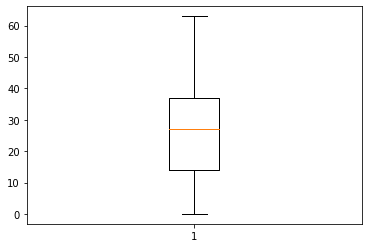

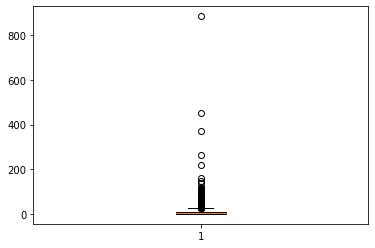

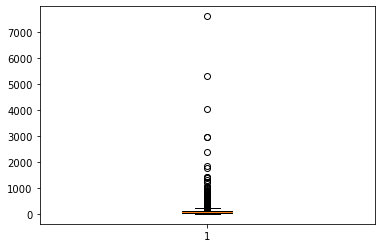

In [177]:
plt.boxplot(rfm['recency'])
plt.show()
plt.boxplot(rfm['frequency'])
plt.show()
plt.boxplot(rfm['monetory'])
plt.show()

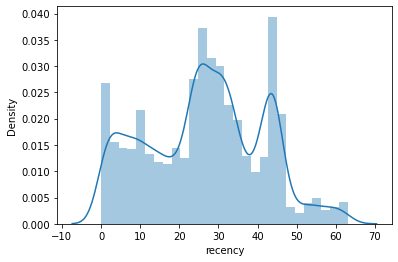

In [178]:
#Recency distribution plot

x = rfm['recency']
ax = sns.distplot(x)

In [179]:
rfm.recency.describe()

count    7887.000000
mean       26.420692
std        14.810752
min         0.000000
25%        14.000000
50%        27.000000
75%        37.000000
max        63.000000
Name: recency, dtype: float64

In [180]:

df1 = df.groupby(['userId','order_date'])["product_name"].value_counts()
df1.tail(60)

userId                                order_date  product_name                                             
ffa86e01-5a62-48d1-8e68-65ac116c7882  2022-01-19  ECOSTORE HAND WASH VANILLA & COCONUT 425ML                   1
                                                  GOURMET TOMATO EACH                                          1
                                                  KALE FRESH BUNCH                                             1
                                                  KIWIFRUIT EACH                                               1
                                                  KOTEX TAMPONS REGULAR                                        1
                                                  KOTEX ULTRA THIN REGULAR PADS WITH WINGS                     1
                                                  LEMON                                                        1
                                                  OATLY BARISTA BLEND OAT MILK 1L                    

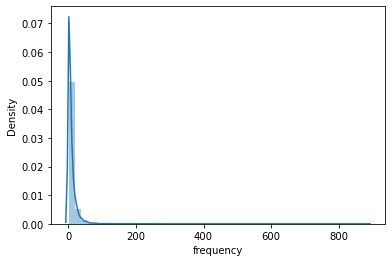

In [181]:
#frequency distribution plot

x = rfm['frequency']
ax = sns.distplot(x)

In [182]:
rfm.frequency.describe()

count    7887.000000
mean        8.886902
std        17.302419
min         1.000000
25%         1.000000
50%         4.000000
75%        11.000000
max       884.000000
Name: frequency, dtype: float64

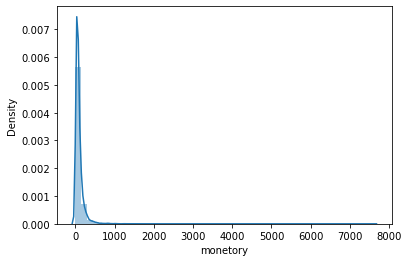

In [183]:
#frequency distribution plot

x = rfm['monetory']
ax = sns.distplot(x)

In [191]:
rfm.monetory.describe()

count    7887.000000
mean       96.119502
std       163.095453
min         0.650000
25%        38.650000
50%        64.200000
75%       108.125000
max      7596.020000
Name: monetory, dtype: float64

In [185]:
#Split into four segments using quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'recency': {0.25: 14.0, 0.5: 27.0, 0.75: 37.0},
 'frequency': {0.25: 1.0, 0.5: 4.0, 0.75: 11.0},
 'monetory': {0.25: 38.65, 0.5: 64.2, 0.75: 108.125}}

In [186]:
#Functions to create R, F and M segments
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [187]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm['R'] = rfm['recency'].apply(RScoring, args=('recency',quantiles,))
rfm['F'] = rfm['frequency'].apply(FnMScoring, args=('frequency',quantiles,))
rfm['M'] = rfm['monetory'].apply(FnMScoring, args=('monetory',quantiles,))
rfm.head()

,userId,recency,frequency,monetory,R,F,M
0,0001f853-db5f-442a-9457-d4d6593314ce,28,6,35.4,3,2,4
1,0005c465-823c-4307-8c0f-ca427726cfd4,39,6,40.5,4,2,3
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,43,1,70.0,4,4,2
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,44,2,321.0,4,3,1
4,00193179-9b65-4888-bf0b-09ad22c24b96,4,29,85.4,1,1,2


In [188]:
rfm['RFMGroup'] = rfm.R.map(str) + rfm.F.map(str) + rfm.M.map(str)
rfm['RFMScore'] = rfm[['R', 'F', 'M']].sum(axis = 1)
rfm.head()

,userId,recency,frequency,monetory,R,F,M,RFMGroup,RFMScore
0,0001f853-db5f-442a-9457-d4d6593314ce,28,6,35.4,3,2,4,324,9
1,0005c465-823c-4307-8c0f-ca427726cfd4,39,6,40.5,4,2,3,423,9
2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,43,1,70.0,4,4,2,442,10
3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,44,2,321.0,4,3,1,431,8
4,00193179-9b65-4888-bf0b-09ad22c24b96,4,29,85.4,1,1,2,112,4


In [189]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm.RFMScore, q = 4, labels = Loyalty_Level)
rfm['RFM_Loyalty_Level'] = Score_cuts.values
rfm.reset_index().head()

,index,userId,recency,frequency,monetory,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,0,0001f853-db5f-442a-9457-d4d6593314ce,28,6,35.4,3,2,4,324,9,Silver
1,1,0005c465-823c-4307-8c0f-ca427726cfd4,39,6,40.5,4,2,3,423,9,Silver
2,2,0014b30d-f1ba-4b7b-8d6a-3c4dd387fc21,43,1,70.0,4,4,2,442,10,Silver
3,3,00192dcd-16fe-4e53-a08f-4122a3ae9a31,44,2,321.0,4,3,1,431,8,Gold
4,4,00193179-9b65-4888-bf0b-09ad22c24b96,4,29,85.4,1,1,2,112,4,Platinum


In [196]:
rfm1 = rfm.loc[(rfm["RFMGroup"] == "111"),["userId","recency","frequency","monetory","RFMGroup","RFM_Loyalty_Level"]]
rfm1

,userId,recency,frequency,monetory,RFMGroup,RFM_Loyalty_Level
8,002aab74-31ee-4ad9-be46-12b78da2bd90,11,62,337.60,111,Platinum
12,0036f41c-4556-400b-b98d-1e79769c00d3,9,24,280.35,111,Platinum
70,02782c03-04d8-4da7-b61c-22511a03e8ac,13,29,200.40,111,Platinum
85,02c57625-5e92-41a8-be83-f95203537862,9,43,245.61,111,Platinum
112,0370a9a7-8017-45d5-9f25-2362a7b670b2,11,36,278.70,111,Platinum
...,...,...,...,...,...,...
7816,fd66ef85-7a15-4963-bcc8-544dd76731a0,10,35,142.20,111,Platinum
7821,fdccada3-4d88-47e5-919f-e577becb8c7d,5,18,166.00,111,Platinum
7834,fe5822a6-6bec-4719-8e02-c8ab3df85a27,8,25,169.40,111,Platinum
7848,fee642ee-5f00-401b-a36a-1c4e2c98f46d,0,17,231.55,111,Platinum


<AxesSubplot:xlabel='RFM_Loyalty_Level', ylabel='recency'>

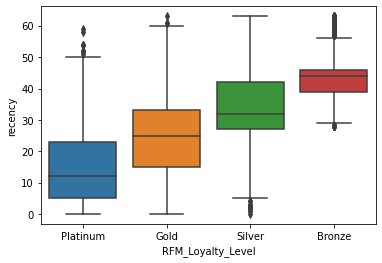

In [194]:
sns.boxplot(x='RFM_Loyalty_Level', y='recency', data=rfm)
